In [12]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [13]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [14]:
%%time
# DL data
path = input_file_directory + "/mefs/mef_mitotracker/mef_mitotracker_exp3.csv"
df_mito_9measures = pandas.read_csv(path, sep = ";")
#change dot to comma
df_mito_9measures.iloc[:,1:] = df_mito_9measures.iloc[:,1:].apply(lambda x: x.str.replace(',','.'))
df_mito_9measures.set_index('Measure', inplace = True)
#change to numeric
df_mito_9measures = df_mito_9measures.apply(pandas.to_numeric, errors='coerce', axis=1)
df_mito_9measures

Wall time: 62.8 ms


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
Measure,,,,,,,,,,,,,,,,,,,,,
1,40.016,39.002,30.433,40.010,39.778,40.536,29.800,9.051,8.168,8.505,...,29.981,6.167,5.475,33.191,30.389,32.059,32.554,32.040,31.122,30.748
2,27.593,29.621,27.698,29.321,29.563,31.364,28.985,2.559,2.510,2.803,...,23.742,2.172,2.146,24.673,24.101,25.033,24.773,24.829,24.928,24.955
3,19.505,21.102,20.495,21.096,21.615,21.599,22.424,1.544,1.462,1.510,...,18.578,2.156,1.991,19.006,19.499,19.059,19.816,20.227,20.383,20.380
4,39.298,31.379,28.526,32.570,31.505,32.050,26.654,8.656,7.857,7.892,...,28.266,10.183,8.531,33.699,27.104,33.881,33.670,32.825,27.237,32.864
5,25.941,24.571,24.747,24.987,25.320,25.634,23.952,2.117,2.017,2.113,...,24.592,2.269,2.143,25.947,25.468,25.868,26.265,26.284,25.633,26.934
6,18.077,19.712,19.615,20.138,20.535,20.998,21.694,1.407,1.391,1.562,...,20.008,1.477,1.479,21.337,20.637,20.914,21.456,21.918,22.948,21.804
7,41.742,33.373,35.124,34.998,33.264,34.672,29.789,5.565,5.712,8.360,...,34.436,3.893,3.400,43.862,34.447,42.791,41.810,42.383,33.214,35.964
8,22.781,21.337,22.374,22.211,20.922,21.434,21.793,6.217,6.513,6.156,...,32.006,2.369,2.336,33.029,32.101,32.948,33.078,33.769,32.787,34.253
9,20.609,20.501,20.295,20.309,19.892,19.472,19.328,11.887,12.383,11.638,...,21.875,9.229,8.406,22.176,22.392,22.210,22.660,22.779,23.155,23.606


In [15]:
# CONTROL
data = ['E','F','G','H']
df_list = []
condition_media = 'DMEM'

for letter in data:
    #select by letter + the good wells
    df_select = df_mito_9measures.loc[:, df_mito_9measures.columns.str.startswith(letter)]
    df_select = df_select.iloc[:, 0:3]
    df_select.columns = "WT MEF", "ATG7-/-", "ATG7-/- +dox"
    #add mean value and save the data in a list
    df_select.loc[letter] = df_select.mean()
    df_select['condition'] = condition_media
    mean_values = df_select.iloc[9:,:]
    df_list.append(mean_values)

df_control = pandas.concat([df_list[0], df_list[1], df_list[2], df_list[3]], axis=0)
df_control

,WT MEF,ATG7-/-,ATG7-/- +dox,condition
Measure,,,,
E,32.242111,25.581889,24.383444,DMEM
F,31.144667,25.438556,24.620333,DMEM
G,30.738000,25.145667,24.013556,DMEM
H,30.496111,28.979889,25.942667,DMEM


In [16]:
# DMEM + FCCP + DMSO
data = ['A','B','C','D']
df_list = []
condition_media = 'DMSO+FCCP'

for letter in data:
    df_select = df_mito_9measures.loc[:, df_mito_9measures.columns.str.startswith(letter)]
    df_select = df_select.iloc[:, 0:7]
    df_select.columns = "WT MEF", "ATG7-/-", "ATG7-/- +dox", "ATG7(1)", "dVSR(1)", "ATG7(2)", "dVSR(2)"
    df_select.loc[letter] = df_select.mean()
    df_select['condition'] = condition_media
    mean_values = df_select.iloc[9:,:]
    df_list.append(mean_values)

df_dmso = pandas.concat([df_list[0], df_list[1], df_list[2], df_list[3]], axis=0)
df_dmso

,WT MEF,ATG7-/-,ATG7-/- +dox,ATG7(1),dVSR(1),ATG7(2),dVSR(2),condition
Measure,,,,,,,,
A,28.395778,26.733111,25.478556,27.293333,26.932667,27.528778,24.935444,DMSO+FCCP
B,30.494111,24.941889,24.575778,25.359333,24.349111,24.903333,24.584889,DMSO+FCCP
C,30.983222,25.068111,24.486222,25.663333,24.719000,24.321111,25.272667,DMSO+FCCP
D,31.654333,25.619111,24.775222,25.469889,24.822000,24.411333,25.241000,DMSO+FCCP


In [17]:
# DMEM + FCCP + BAF
data = ['E','F','G','H']
df_list = []
condition_media = 'BAF+FCCP'

for letter in data:
    df_select = df_mito_9measures.loc[:, df_mito_9measures.columns.str.startswith(letter)]
    df_select = df_select.iloc[:, 5:]
    df_select.columns = "WT MEF", "ATG7-/-", "ATG7-/- +dox", "ATG7(1)", "dVSR(1)", "ATG7(2)", "dVSR(2)"
    df_select.loc[letter] = df_select.mean()
    df_select['condition'] = condition_media
    mean_values = df_select.iloc[9:,:]
    df_list.append(mean_values)

df_baf = pandas.concat([df_list[0], df_list[1], df_list[2], df_list[3]], axis=0)
df_baf

,WT MEF,ATG7-/-,ATG7-/- +dox,ATG7(1),dVSR(1),ATG7(2),dVSR(2),condition
Measure,,,,,,,,
E,24.608556,25.026000,25.241000,25.567000,25.522222,25.622111,25.583556,BAF+FCCP
F,25.161222,25.637778,25.794889,25.354333,25.881778,25.770667,26.408556,BAF+FCCP
G,24.887778,25.589333,26.023333,25.637889,25.699222,25.625667,25.306444,BAF+FCCP
H,28.546667,26.237556,28.307000,28.453556,28.561556,26.823000,27.945333,BAF+FCCP


In [18]:
#pull the results
df_mitotracker = pandas.concat([df_dmso, df_baf,df_control], axis=0)
df_mitotracker.reset_index(drop=True, inplace=True)
col = df_mitotracker.pop("condition")
df_mitotracker.insert(0, "condition", col)

path = 'ATG7/Mitotracker/'
df_mitotracker.to_csv(output_file_directory+path+'number_mito_exp3.csv', header=True, index=False, sep=',')

df_mitotracker

,condition,WT MEF,ATG7-/-,ATG7-/- +dox,ATG7(1),dVSR(1),ATG7(2),dVSR(2)
0,DMSO+FCCP,28.395778,26.733111,25.478556,27.293333,26.932667,27.528778,24.935444
1,DMSO+FCCP,30.494111,24.941889,24.575778,25.359333,24.349111,24.903333,24.584889
2,DMSO+FCCP,30.983222,25.068111,24.486222,25.663333,24.719000,24.321111,25.272667
3,DMSO+FCCP,31.654333,25.619111,24.775222,25.469889,24.822000,24.411333,25.241000
4,BAF+FCCP,24.608556,25.026000,25.241000,25.567000,25.522222,25.622111,25.583556
5,BAF+FCCP,25.161222,25.637778,25.794889,25.354333,25.881778,25.770667,26.408556
6,BAF+FCCP,24.887778,25.589333,26.023333,25.637889,25.699222,25.625667,25.306444
7,BAF+FCCP,28.546667,26.237556,28.307000,28.453556,28.561556,26.823000,27.945333
8,DMEM,32.242111,25.581889,24.383444,NaN,NaN,NaN,NaN
9,DMEM,31.144667,25.438556,24.620333,NaN,NaN,NaN,NaN


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


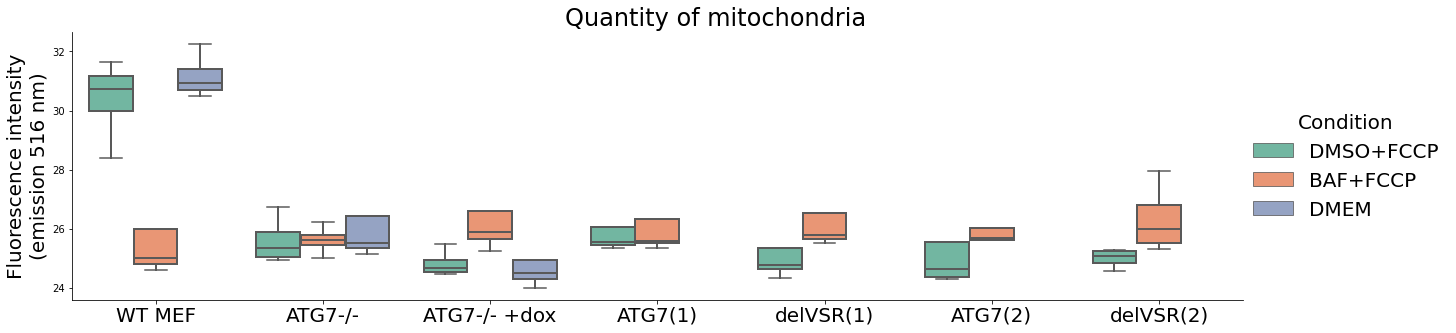

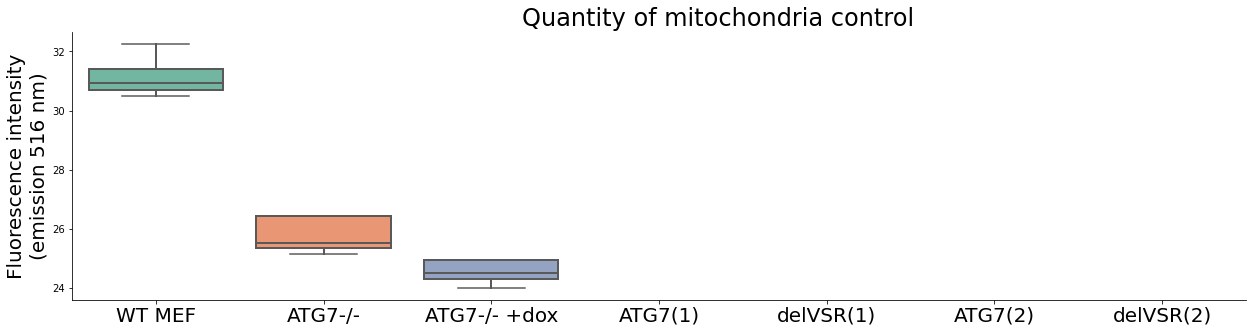

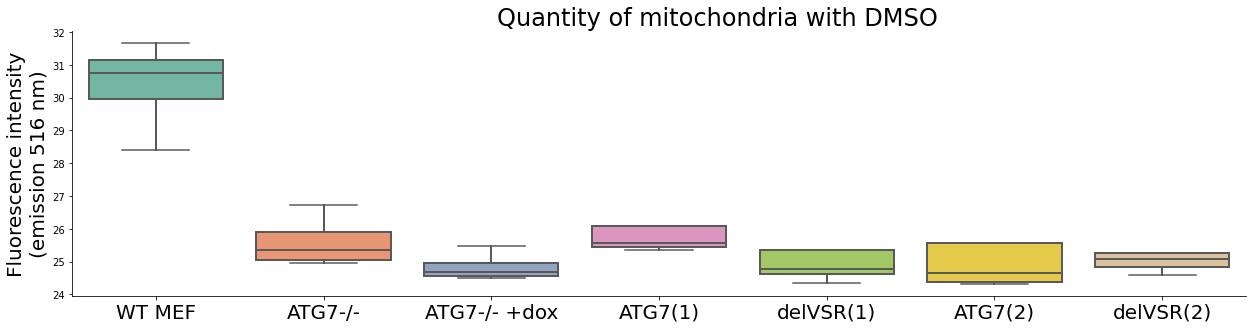

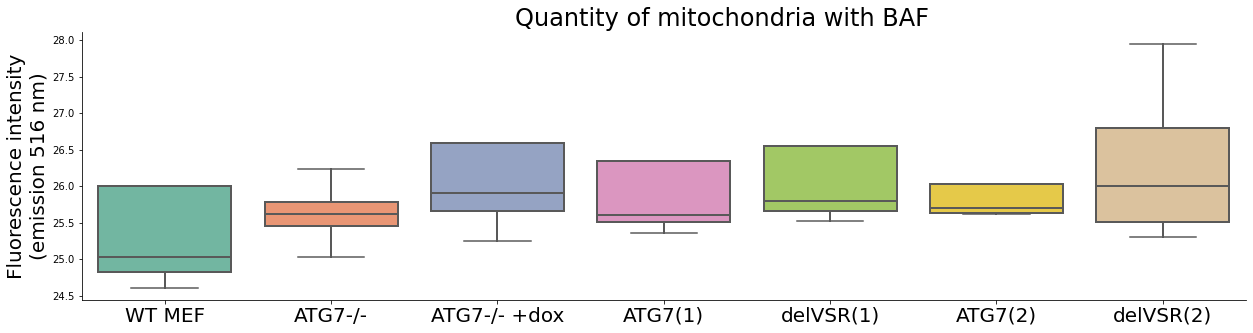

In [10]:
# Distribution: Data preparation + graph
all_data = [[df_mitotracker, 'Quantity of mitochondria', '(emission 516 nm)']]

for data_ in all_data:
    Data = data_[0]
    info = data_[1]
    info_fluo = data_[2]
    
    shape = Data.shape
    shape = shape[0]

    #select the sample type column
    media_condition = {'condition':[Data.iloc[:,0][i]
      for i in range(0, shape)]}

    #convert to df, and copy it 3 times
    media_conditiondf = pandas.DataFrame(media_condition)
    media_conditiondf = pandas.concat([media_conditiondf,media_conditiondf,media_conditiondf,
                                      media_conditiondf,media_conditiondf,media_conditiondf,
                                      media_conditiondf])

    media_conditiondf.reset_index(drop=True, inplace=True)

    # Y for expression value 
    y = {'y':[Data.iloc[:,j][i]
      for j in range(1,8)
        for i in range(0, shape)]}

    #create df with Y 
    data_distrib = pandas.DataFrame(y).astype(float)

    # X for ATG7/iso1/iso2                              
    data_distrib.loc[:shape,'x'] = 'WT MEF'
    data_distrib.loc[shape: shape*2,'x'] = 'ATG7-/-'
    data_distrib.loc[shape*2: shape*3,'x'] = 'ATG7-/- +dox'
    data_distrib.loc[shape*3: shape*4,'x'] = 'ATG7(1)'
    data_distrib.loc[shape*4: shape*5,'x'] = 'delVSR(1)'
    data_distrib.loc[shape*5: shape*6,'x'] = 'ATG7(2)'
    data_distrib.loc[shape*6:,'x'] = 'delVSR(2)'

    # Will be used for Hue
    data_distrib['Condition'] = media_conditiondf['condition']
    
    #graph to see BAF + DMSO in the same graph. Useful to see BAF effect
    seaborn.catplot(x="x", y="y", hue="Condition", aspect = 3.5, kind="box", palette = 'Set2', data = data_distrib, 
                  boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

    plt.ylabel('Fluorescence intensity\n' + info_fluo)
    plt.xlabel('')
    plt.title(info, x=.55)
    print()

    #separation of DMSO and BAF
    df_control = data_distrib[data_distrib['Condition'].str.startswith('DMEM')]
    df_dmso = data_distrib[data_distrib['Condition'].str.startswith('DMSO')]
    df_baf = data_distrib[data_distrib['Condition'].str.startswith('BAF')]
    
    dfs_conditions = [[df_control, ' control'], [df_dmso, ' with DMSO'], [df_baf, ' with BAF']]
    for df_ in dfs_conditions:
        data_drug = df_[0]
        drug_info = df_[1]
    
        #graph with BAF or DMSO treatment separatly to have a better view of the cell lines
        seaborn.catplot(x="x", y="y", aspect = 3.5, kind="box", palette = 'Set2', data = data_drug,
                        boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

        plt.ylabel('Fluorescence intensity\n' + info_fluo)
        plt.xlabel('')
        plt.title(info+drug_info, x=.55)
        print()

# print()


In [11]:
#Distribution: Stats for all 
all_data = [[df_mitotracker, 'amount of mitochondria', '(emission 516 nm)']]

column_name = df_mitotracker.keys()
for data_ in all_data:
    Data = data_[0]
    info = data_[1]
    info_fluo = data_[2]  
    print(info)
    
    #separation of DMSO and BAF
    df_dmso = Data[Data['condition'].str.startswith('DMSO')]
    df_baf = Data[Data['condition'].str.startswith('BAF')]

    dfs_conditions = [[df_dmso, 'with DMSO'], [df_baf, 'with BAF']]
    for df_ in dfs_conditions:
        data_drug = df_[0]
        drug_info = df_[1]
        print(drug_info.upper())
        
        # Mann-Whitney analysis 
        #EV vs WT1
        statistic, pvalue = scipy.stats.mannwhitneyu(data_drug[column_name[3]], data_drug[column_name[4]])
        Pvalue = "{:.3E}".format(pvalue)
        print(column_name[3], "and", column_name[4], drug_info, 'pvalue is', Pvalue)
        
        #EV vs WT1
        statistic, pvalue = scipy.stats.mannwhitneyu(data_drug[column_name[3]], data_drug[column_name[6]])
        Pvalue = "{:.3E}".format(pvalue)
        print(column_name[3], "and", column_name[6], drug_info, 'pvalue is', Pvalue)
        
         #EV vs WT2
        statistic, pvalue = scipy.stats.mannwhitneyu(data_drug[column_name[4]], data_drug[column_name[6]])
        Pvalue = "{:.3E}".format(pvalue)
        print(column_name[4], "and", column_name[6], drug_info, 'pvalue is', Pvalue)
        print()

amount of mitochondria
WITH DMSO
ATG7-/- +dox and ATG7(1) with DMSO pvalue is 5.618E-02
ATG7-/- +dox and ATG7(2) with DMSO pvalue is 4.426E-01
ATG7(1) and ATG7(2) with DMSO pvalue is 1.562E-01

WITH BAF
ATG7-/- +dox and ATG7(1) with BAF pvalue is 4.426E-01
ATG7-/- +dox and ATG7(2) with BAF pvalue is 3.325E-01
ATG7(1) and ATG7(2) with BAF pvalue is 3.325E-01

